</h> AMATH 563 Inferring Structure of Complex System</h>

In [1]:
%matplotlib inline

In [2]:
import conx as cx

mnist = cx.Dataset.get('mnist')
mnist.summary()

Using TensorFlow backend.
ConX, version 3.7.10


_________________________________________________________________
Unnamed Dataset:
Patterns    Shape                 Range                         
inputs      (28, 28, 1)           (0.0, 1.0)                    
targets     (10,)                 (0, 1)                        
Total patterns: 70000
   Training patterns: 70000
   Testing patterns: 0
_________________________________________________________________


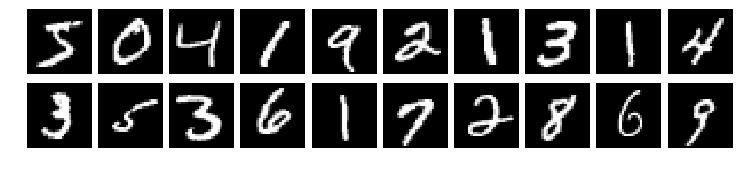

In [3]:
cx.view(mnist.inputs[0:20], layout=(2,10))

In [4]:
mnist.targets[0]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [5]:
indices = [i for i in range(len(mnist.inputs)) if mnist.labels[i] == '2']
print('Found', len(indices), 'twos')
print(indices[:20])

Found 6990 twos
[5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 143, 159, 161, 171, 178, 180, 187, 189, 190, 199]


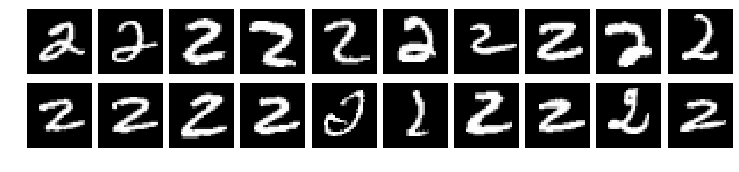

In [6]:
cx.view(mnist.inputs[indices[:20]], layout=(2,10))

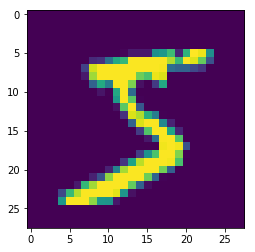

In [7]:
import numpy as np
from matplotlib.pyplot import imshow
imshow(np.reshape(mnist.inputs[0], (28, 28)))

## Shuffle dataset and construct Ax = B

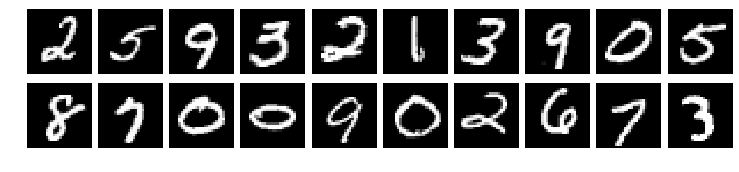

In [8]:
mnist.shuffle()
cx.view(mnist.inputs[0:20], layout=(2,10))

In [9]:
mnist.split(10000)
mnist.split()

(60000, 10000)

In [10]:
A = np.zeros((60000,784))
B = np.zeros((60000,10))

In [11]:
for i in range(60000):
    A[i] = np.reshape(mnist.train_inputs[i], (1, 784))
    B[i] = mnist.train_targets[i]

In [12]:
A.shape

(60000, 784)

In [13]:
B.shape

(60000, 10)

## Solve Ax = B use Least-square, Lasso, and Ridge

### Least-square

In [14]:
# least square approach
from numpy import linalg
x_pinv = linalg.pinv(A).dot(B)

We thus optimized 2-Norm to solve the Ax = B problem, which gives us a coefficient x_pinv i.e. a mapping from the image space to the label space

In [15]:
from sklearn.metrics import classification_report, accuracy_score
y_true = list(map(float, mnist.train_labels[:]))
y_pred_pinv = [np.argmax(x) for x in A.dot(x_pinv)]
target_names = ['digit 0','digit 1','digit 2','digit 3','digit 4','digit 5','digit 6','digit 7','digit 8','digit 9']

In [16]:
print(classification_report(y_true, y_pred_pinv, target_names=target_names))

              precision    recall  f1-score   support

     digit 0       0.91      0.96      0.93      5917
     digit 1       0.82      0.97      0.89      6703
     digit 2       0.90      0.81      0.85      6011
     digit 3       0.82      0.85      0.84      6049
     digit 4       0.84      0.88      0.86      5818
     digit 5       0.87      0.70      0.77      5426
     digit 6       0.89      0.92      0.91      5891
     digit 7       0.87      0.86      0.87      6253
     digit 8       0.80      0.75      0.77      5933
     digit 9       0.81      0.80      0.80      5999

   micro avg       0.85      0.85      0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



In [17]:
accuracy_score(y_true, y_pred_pinv)

0.8520166666666666

### Lasso

In [18]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.005)
clf_lasso.fit(A, B)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
x_lasso = np.transpose(clf_lasso.coef_)
y_pred_lasso = [np.argmax(x) for x in A.dot(x_lasso)]

In [20]:
print(classification_report(y_true, y_pred_lasso, target_names=target_names))

              precision    recall  f1-score   support

     digit 0       0.93      0.87      0.90      5917
     digit 1       0.91      0.86      0.88      6703
     digit 2       0.88      0.76      0.81      6011
     digit 3       0.73      0.79      0.76      6049
     digit 4       0.90      0.69      0.78      5818
     digit 5       0.96      0.28      0.43      5426
     digit 6       0.86      0.89      0.88      5891
     digit 7       0.95      0.77      0.85      6253
     digit 8       0.40      0.92      0.56      5933
     digit 9       0.77      0.72      0.75      5999

   micro avg       0.76      0.76      0.76     60000
   macro avg       0.83      0.76      0.76     60000
weighted avg       0.83      0.76      0.77     60000



In [21]:
accuracy_score(y_true, y_pred_lasso)

0.7619833333333333

### Ridge

In [22]:
clf_ridge = linear_model.Ridge(alpha=0.005)
clf_ridge.fit(A, B)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
x_ridge = np.transpose(clf_ridge.coef_)
y_pred_ridge = [np.argmax(x) for x in A.dot(x_ridge)]

In [24]:
print(classification_report(y_true, y_pred_ridge, target_names=target_names))

              precision    recall  f1-score   support

     digit 0       0.96      0.91      0.93      5917
     digit 1       0.94      0.87      0.90      6703
     digit 2       0.89      0.79      0.84      6011
     digit 3       0.78      0.84      0.81      6049
     digit 4       0.94      0.72      0.82      5818
     digit 5       0.94      0.45      0.61      5426
     digit 6       0.89      0.92      0.91      5891
     digit 7       0.93      0.81      0.87      6253
     digit 8       0.49      0.92      0.64      5933
     digit 9       0.76      0.84      0.80      5999

   micro avg       0.81      0.81      0.81     60000
   macro avg       0.85      0.81      0.81     60000
weighted avg       0.85      0.81      0.82     60000



In [25]:
accuracy_score(y_true, y_pred_ridge)

0.81135

## Data Sparsity

In [26]:
import matplotlib.pyplot as plt

In [27]:
# sum over rows for all 784 pixels
coef_pinv = np.sum(abs(x_pinv), axis=1)
coef_pinv.shape

(784,)

Text(0.5, 1.0, 'Overall Absolute Value of each pixel - Least Square')

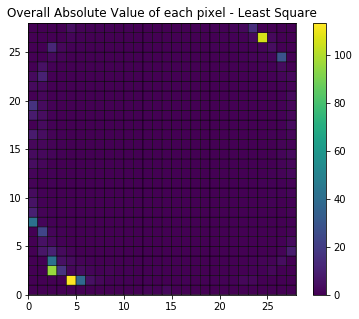

In [28]:
plt.figure(figsize=(6,5))
plt.pcolor(coef_pinv.reshape(28,28),edgecolors='k', linewidths=0.5)
plt.colorbar()
plt.title('Overall Absolute Value of each pixel - Least Square')

In [29]:
# Only look into the largest value of a pixel
coef_pinv2 = np.amax(abs(x_pinv), axis=1)
coef_pinv2.shape

(784,)

Text(0.5, 1.0, 'Maximum Absolute Value of each pixel - Least Square')

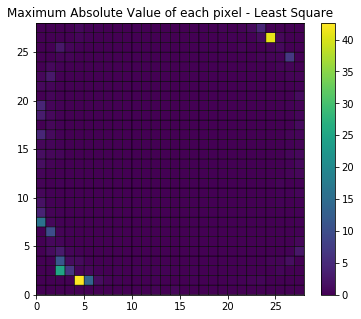

In [30]:
plt.figure(figsize=(6,5))
plt.pcolor(coef_pinv2.reshape(28,28),edgecolors='k', linewidths=0.5)
plt.colorbar()
plt.title('Maximum Absolute Value of each pixel - Least Square')

looks like we get the exact plot from both appraches

Text(0.5, 1.0, 'Overall Absolute Value of each pixel - Ridge')

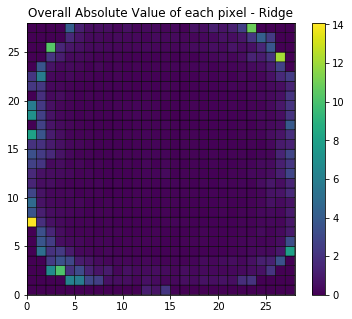

In [31]:
# sum over rows for all 784 pixels
coef_ridge = np.sum(abs(x_ridge), axis=1)
coef_ridge.shape

plt.figure(figsize=(6,5))
plt.pcolor(coef_ridge.reshape(28,28),edgecolors='k', linewidths=0.5)
plt.colorbar()
plt.title('Overall Absolute Value of each pixel - Ridge')

Text(0.5, 1.0, 'Overall Absolute Value of each pixel - LASSO')

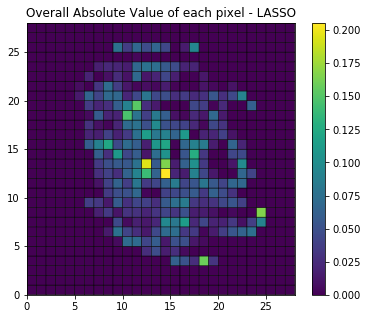

In [32]:
# sum over rows for all 784 pixels
coef_lasso = np.sum(abs(x_lasso), axis=1)
coef_lasso.shape

plt.figure(figsize=(6,5))
plt.pcolor(coef_lasso.reshape(28,28),edgecolors='k', linewidths=0.5)
plt.colorbar()
plt.title('Overall Absolute Value of each pixel - LASSO')

In general, different from Ridge and Least square approach, most informative pixels are located in the middle of the picture for LASSO, while Ridge and Least sqaure has similarity that informative pixels falls along the edges of the picture

## Accuracy vs rank

In [46]:
def run_rank_accuracy(x, coef, rank):
    x_ranked = np.copy(x)
    
    sorted_idx = np.argsort(coef)
    x_ranked[sorted_idx[0:784-rank],:] = np.zeros(10)
    
    y_pred_ranked = [np.argmax(x) for x in A.dot(x_ranked)]
    
    #print(classification_report(y_true, y_pred_ranked, target_names=target_names))
    #print('accuracy: ', round(accuracy_score(y_true, y_pred_ranked),2))

    return round(accuracy_score(y_true, y_pred_ranked),2)

In [49]:
pinv_accuracy_rank_curve = [run_rank_accuracy(x_pinv, coef_pinv, x) for x in range(784)]

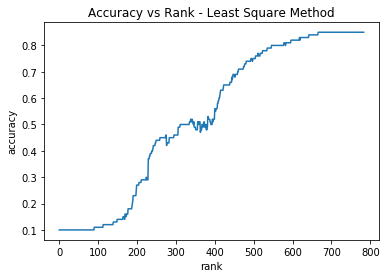

In [51]:
plt.plot(pinv_accuracy_rank_curve)
plt.ylabel('accuracy')
plt.xlabel('rank')
plt.title('Accuracy vs Rank - Least Square Method')
plt.show()

In [107]:
lasso_accuracy_rank_curve = [run_rank_accuracy(x_lasso, coef_lasso, x) for x in range(784)]

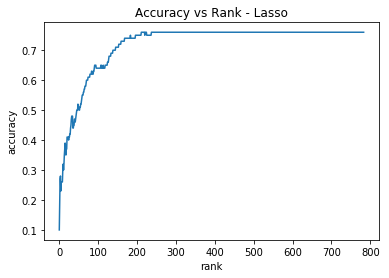

In [108]:
plt.plot(lasso_accuracy_rank_curve)
plt.ylabel('accuracy')
plt.xlabel('rank')
plt.title('Accuracy vs Rank - Lasso')
plt.show()

In [109]:
ridge_accuracy_rank_curve = [run_rank_accuracy(x_ridge, coef_ridge, x) for x in range(784)]

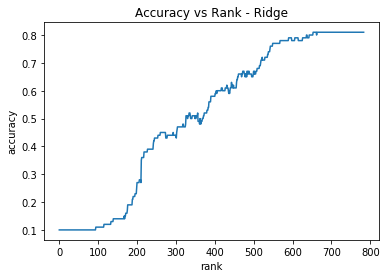

In [110]:
plt.plot(ridge_accuracy_rank_curve)
plt.ylabel('accuracy')
plt.xlabel('rank')
plt.title('Accuracy vs Rank - Ridge')
plt.show()

## Informative pixels per digit

In [68]:
# To find the most informative pixels column by column

In [123]:
def pixel_per_digits(x, method):
    
    legend = np.abs(x).max()
    
    fig,  ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5,figsize=(10, 5))
    
    fig.suptitle('Most informative pixels for each digits - ' + method)
    
    ax0.pcolor(x[:,0].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax0.set_title('0')
    ax1.pcolor(x[:,1].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax1.set_title('1')
    ax2.pcolor(x[:,2].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax2.set_title('2')
    ax3.pcolor(x[:,3].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax3.set_title('3')
    ax4.pcolor(x[:,4].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax4.set_title('4')
    ax5.pcolor(x[:,5].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax5.set_title('5')
    ax6.pcolor(x[:,6].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax6.set_title('6')
    ax7.pcolor(x[:,7].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax7.set_title('7')
    ax8.pcolor(x[:,8].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax8.set_title('8')
    ax9.pcolor(x[:,9].reshape(28, 28),vmin=-legend, vmax=legend,cmap='RdBu')
    ax9.set_title('9')

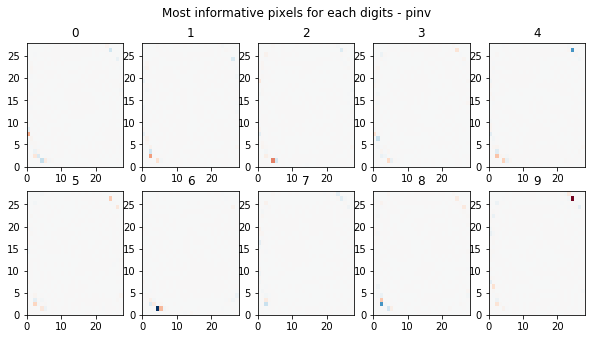

In [124]:
pixel_per_digits(x_pinv,'pinv')

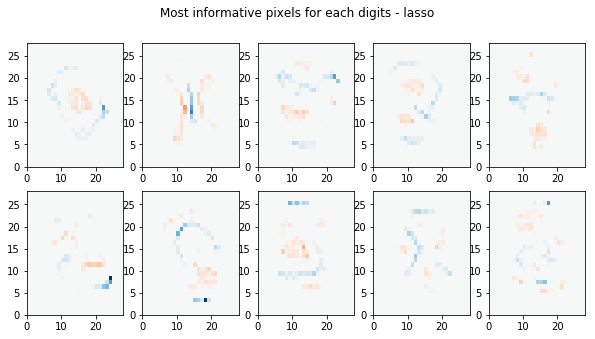

In [125]:
pixcel_per_digits(x_lasso,'lasso')

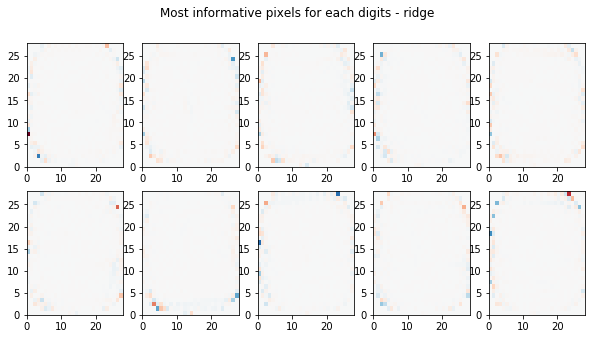

In [122]:
pixcel_per_digits(x_ridge,'ridge')